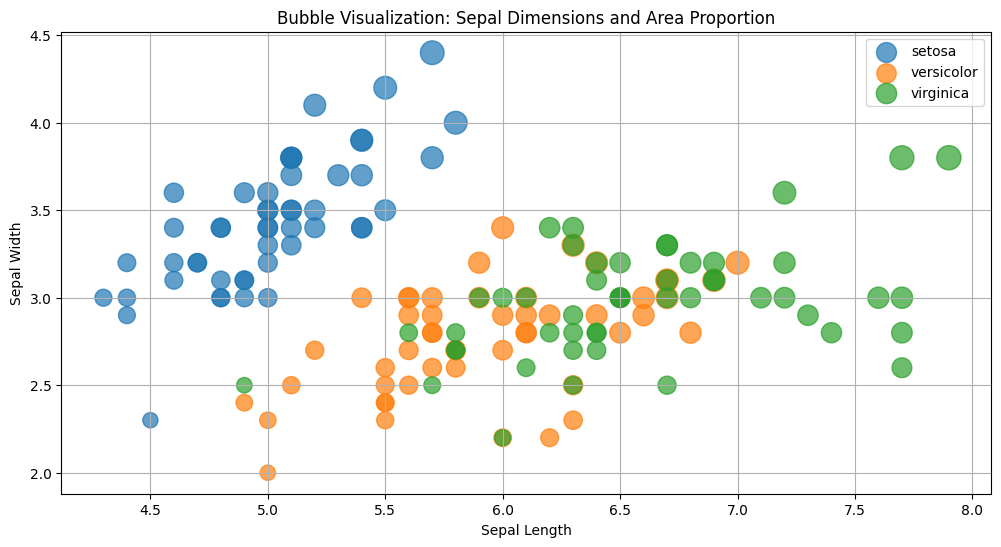

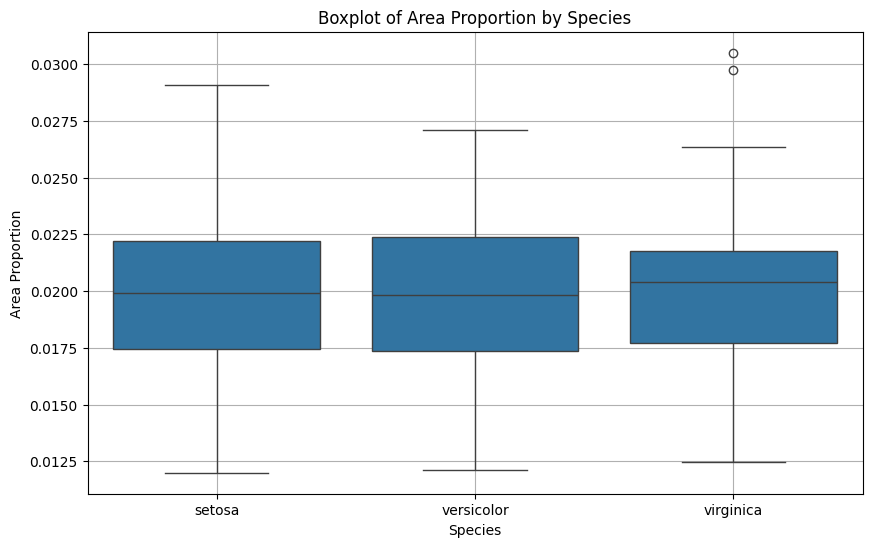

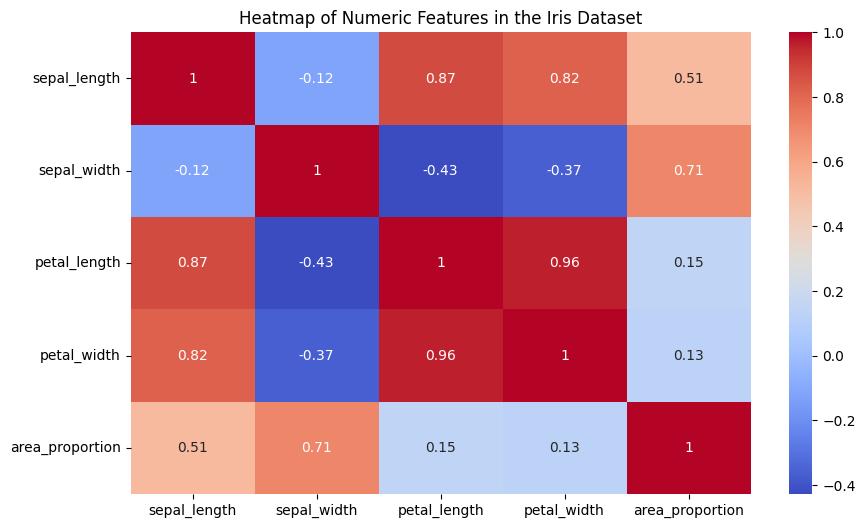

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the Iris dataset from Seaborn
iris = sns.load_dataset("iris")

# Step 2: Create a new feature 'area proportion' for each species
# Initialize an empty column
iris["area_proportion"] = 0.0

# Calculate the area proportion for each species separately
for species in iris["species"].unique():
    # Filter data for the species
    species_data = iris[iris["species"] == species]

    # Calculate the area for each flower (sepal length * sepal width)
    individual_area = np.multiply(species_data["sepal_length"], species_data["sepal_width"])

    # Calculate the overall area (sum of all individual areas for this species)
    overall_area = np.sum(individual_area)

    # Calculate the area proportion
    iris.loc[iris["species"] == species, "area_proportion"] = individual_area / overall_area

# Step 3: Create visualizations
# Bubble visualization: Sepal length vs. Sepal width with bubble size as area proportion
plt.figure(figsize=(12, 6))
for species in iris["species"].unique():
    species_data = iris[iris["species"] == species]
    plt.scatter(
        species_data["sepal_length"],
        species_data["sepal_width"],
        s=species_data["area_proportion"] * 10000,  # Scale bubble size
        label=species,
        alpha=0.7
    )
plt.title("Bubble Visualization: Sepal Dimensions and Area Proportion")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()
plt.grid(True)
plt.show()

# Another visualization: Boxplot of area proportions for each species
plt.figure(figsize=(10, 6))
sns.boxplot(x="species", y="area_proportion", data=iris)
plt.title("Boxplot of Area Proportion by Species")
plt.ylabel("Area Proportion")
plt.xlabel("Species")
plt.grid(True)
plt.show()

# Create a heatmap with only numeric columns
numeric_data = iris.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.title("Heatmap of Numeric Features in the Iris Dataset")
plt.show()

<ipython-input-2-f3ad69d5d77f>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="species", y="body_mass_variance", data=penguins, palette="muted")


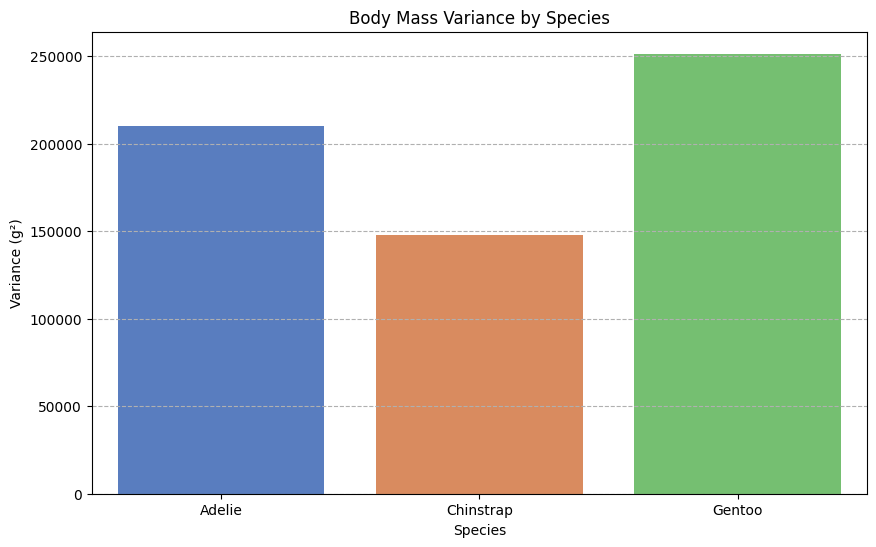

<ipython-input-2-f3ad69d5d77f>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="species", y="covariance_ratio", data=penguins, palette="pastel")


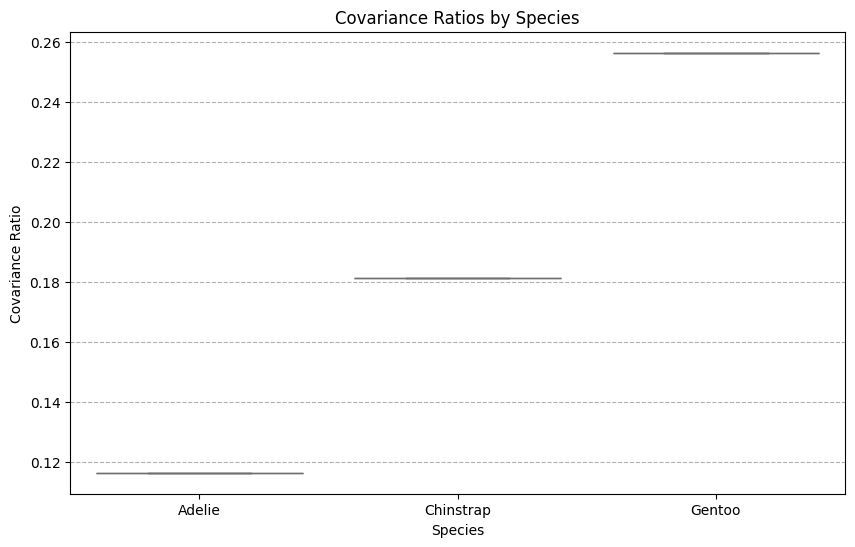

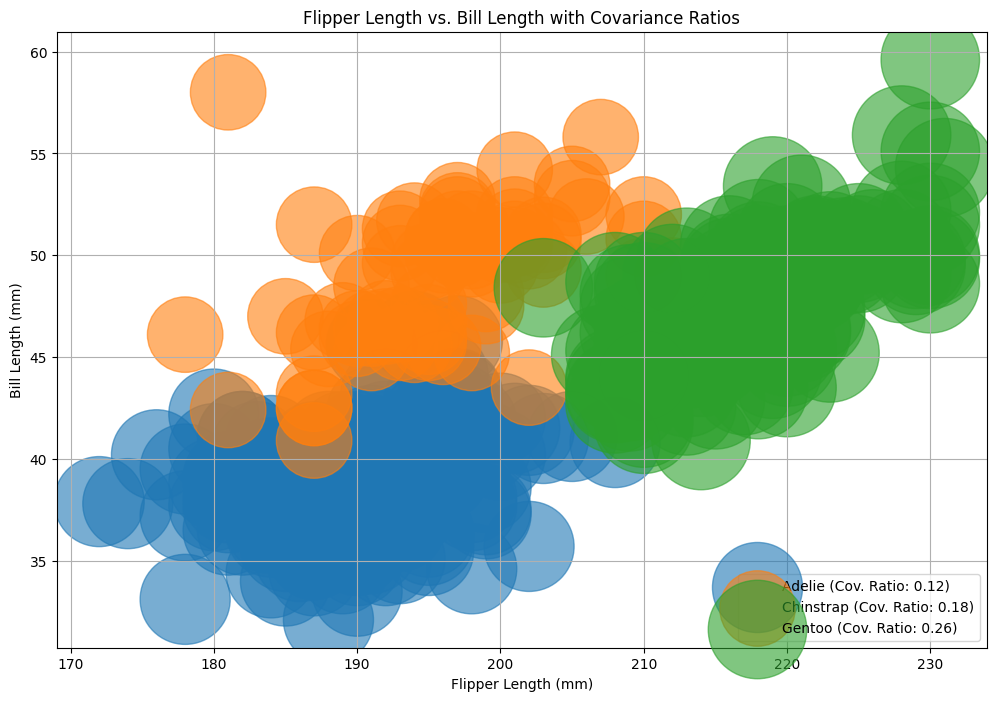

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the Penguins dataset
penguins = sns.load_dataset("penguins")

# Step 2: Handle missing data (optional)
penguins.dropna(inplace=True)

# Step 3: Create new features
# Feature 1: Variance of body mass by species
species_variance = penguins.groupby("species")["body_mass_g"].var().to_dict()
penguins["body_mass_variance"] = penguins["species"].map(species_variance)

# Feature 2: Covariance ratio between flipper and bill lengths
cov_ratios = {}
for species in penguins["species"].unique():
    species_data = penguins[penguins["species"] == species]
    covariance_matrix = np.cov(species_data["flipper_length_mm"], species_data["bill_length_mm"])
    covariance_ratio = covariance_matrix[0, 1] / np.sum(np.diag(covariance_matrix))
    cov_ratios[species] = covariance_ratio
penguins["covariance_ratio"] = penguins["species"].map(cov_ratios)

# Step 4: Visualizations
# Visualization 1: Body Mass Variance
plt.figure(figsize=(10, 6))
sns.barplot(x="species", y="body_mass_variance", data=penguins, palette="muted")
plt.title("Body Mass Variance by Species")
plt.ylabel("Variance (g²)")
plt.xlabel("Species")
plt.grid(axis="y", linestyle="--")
plt.show()

# Visualization 2: Covariance Ratios
plt.figure(figsize=(10, 6))
sns.boxplot(x="species", y="covariance_ratio", data=penguins, palette="pastel")
plt.title("Covariance Ratios by Species")
plt.ylabel("Covariance Ratio")
plt.xlabel("Species")
plt.grid(axis="y", linestyle="--")
plt.show()

# Visualization 3: Scatterplot
plt.figure(figsize=(12, 8))
for species in penguins["species"].unique():
    species_data = penguins[penguins["species"] == species]
    plt.scatter(
        species_data["flipper_length_mm"],
        species_data["bill_length_mm"],
        label=f"{species} (Cov. Ratio: {cov_ratios[species]:.2f})",
        alpha=0.6,
        s=species_data["body_mass_variance"] / 50,
    )
plt.title("Flipper Length vs. Bill Length with Covariance Ratios")
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Bill Length (mm)")
plt.legend()
plt.grid(True)
plt.show()

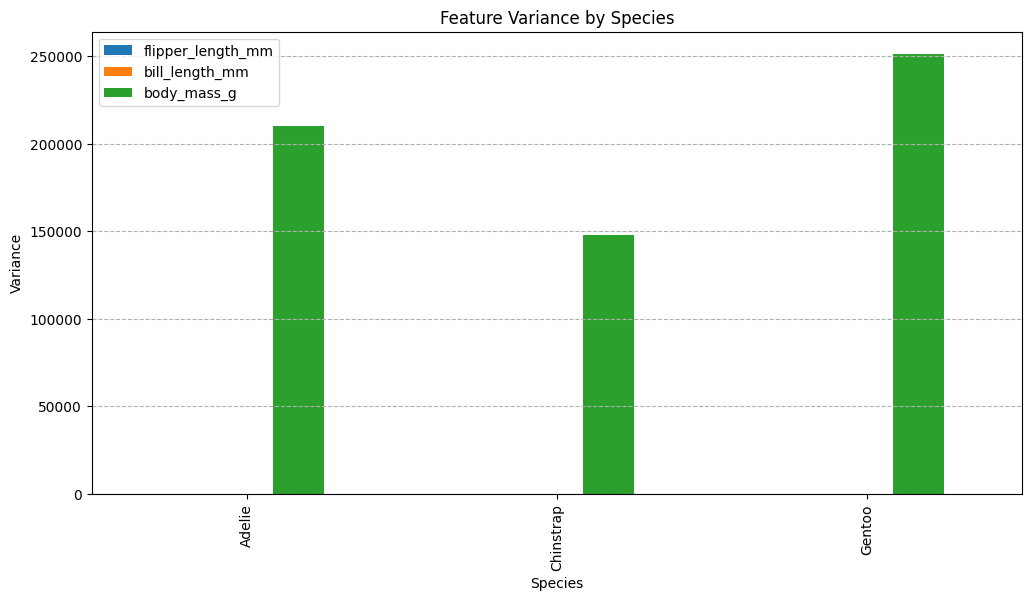

<ipython-input-3-b01fee006a12>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="species", y="size_ratio", data=penguins, palette="muted")


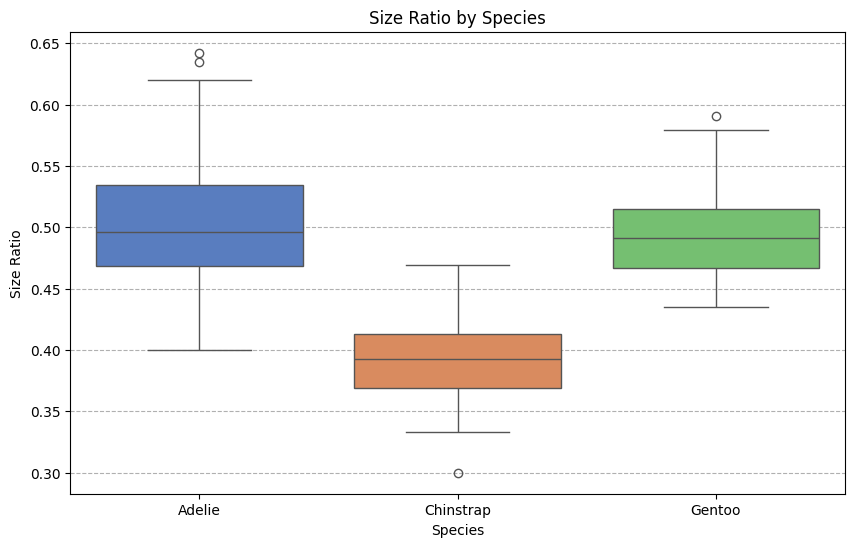

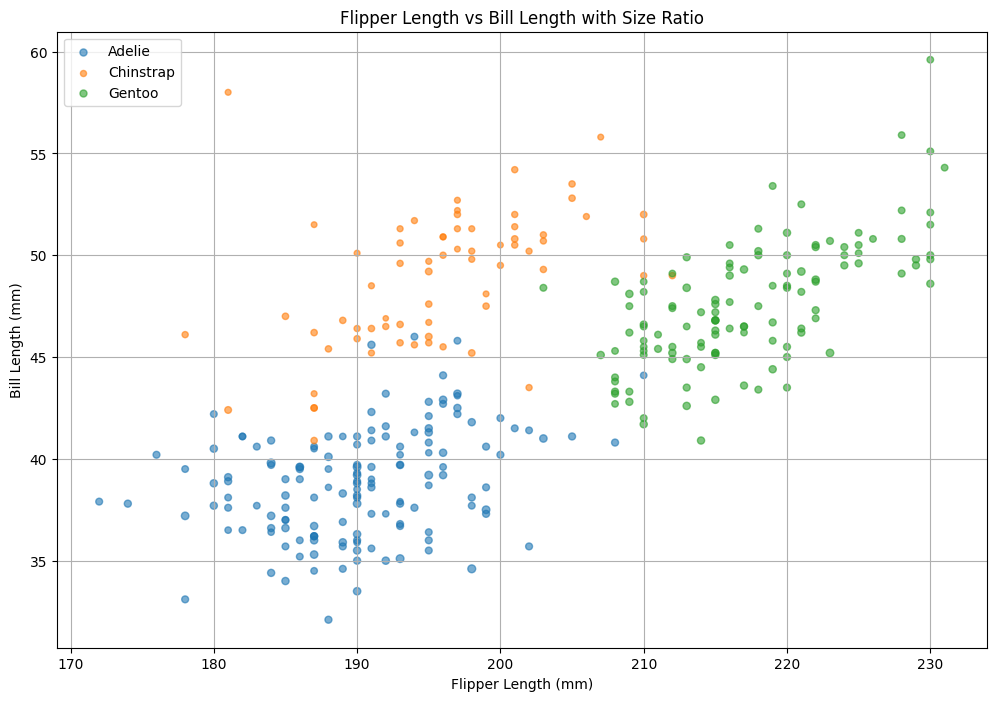

In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assume the Penguins dataset is already loaded
# Sample structure:
# penguins = pd.DataFrame({
#     "species": ["Adelie", "Chinstrap", "Gentoo", ...],
#     "flipper_length_mm": [...],
#     "bill_length_mm": [...],
#     "body_mass_g": [...]
# })

# Step 1: Analyze Variance, Standard Deviation, and Covariance
# Variance of features for each species
feature_variances = penguins.groupby("species")[["flipper_length_mm", "bill_length_mm", "body_mass_g"]].var()

# Standard deviation of features for each species
feature_std = penguins.groupby("species")[["flipper_length_mm", "bill_length_mm", "body_mass_g"]].std()

# Covariance matrices for each species
cov_matrices = {}
for species in penguins["species"].unique():
    species_data = penguins[penguins["species"] == species]
    cov_matrices[species] = np.cov(
        species_data["flipper_length_mm"],
        species_data["bill_length_mm"]
    )

# Step 2: Create a new feature - "Size Ratio"
# Size Ratio = body mass (g) / (flipper length * bill length)
penguins["size_ratio"] = penguins["body_mass_g"] / (penguins["flipper_length_mm"] * penguins["bill_length_mm"])

# Step 3: Visualization of Variance and Size Ratio
# Visualization 1: Variance of Features
feature_variances.plot(kind="bar", figsize=(12, 6), title="Feature Variance by Species")
plt.ylabel("Variance")
plt.xlabel("Species")
plt.grid(axis="y", linestyle="--")
plt.show()

# Visualization 2: Size Ratio by Species
plt.figure(figsize=(10, 6))
sns.boxplot(x="species", y="size_ratio", data=penguins, palette="muted")
plt.title("Size Ratio by Species")
plt.ylabel("Size Ratio")
plt.xlabel("Species")
plt.grid(axis="y", linestyle="--")
plt.show()

# Visualization 3: Scatter Plot - Flipper Length vs Bill Length with Size Ratio
plt.figure(figsize=(12, 8))
for species in penguins["species"].unique():
    species_data = penguins[penguins["species"] == species]
    plt.scatter(
        species_data["flipper_length_mm"],
        species_data["bill_length_mm"],
        s=species_data["size_ratio"] * 50,  # Size proportional to size ratio
        alpha=0.6,
        label=species
    )
plt.title("Flipper Length vs Bill Length with Size Ratio")
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Bill Length (mm)")
plt.legend()
plt.grid(True)
plt.show()

In [4]:
import numpy as np
import pandas as pd
import time

# Generate random data for benchmarking
np.random.seed(42)
data = np.random.rand(1_000_000)

# Benchmark NumPy std
start_numpy = time.time()
numpy_std = np.std(data)
end_numpy = time.time()

# Benchmark Pandas std
data_series = pd.Series(data)
start_pandas = time.time()
pandas_std = data_series.std()
end_pandas = time.time()

# Print results
print("NumPy std:", numpy_std, "Time:", end_numpy - start_numpy, "seconds")
print("Pandas std:", pandas_std, "Time:", end_pandas - start_pandas, "seconds")

NumPy std: 0.28859098214295287 Time: 0.018184423446655273 seconds
Pandas std: 0.2885911264385534 Time: 0.009418010711669922 seconds


Original Skewness: 1.87
Original Kurtosis: 5.22


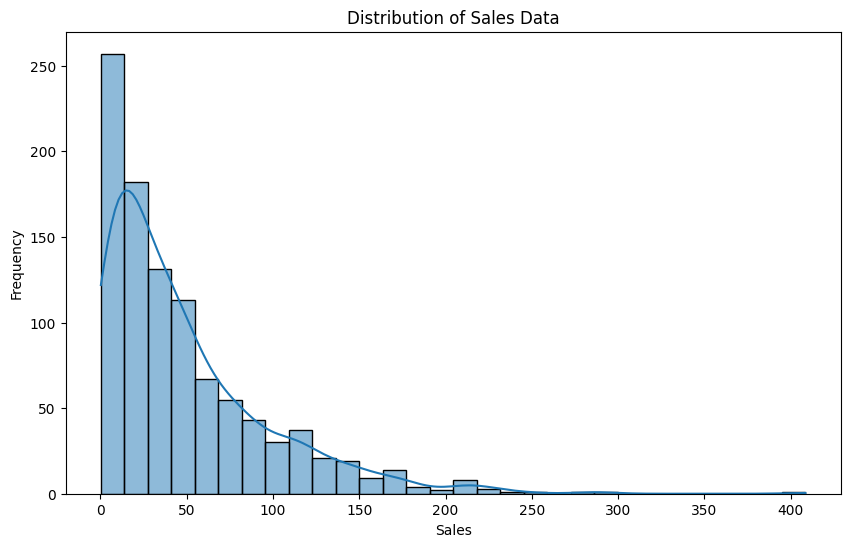

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import skew,kurtosis
import matplotlib.pyplot as plt

np.random.seed(42)
sales_data = np.random.exponential(scale=50,size=1000)

original_skewness = skew(sales_data)
original_kurtosis = kurtosis(sales_data)

print(f"Original Skewness: {original_skewness:.2f}")
print(f"Original Kurtosis: {original_kurtosis:.2f}")

plt.figure(figsize=(10,6))
sns.histplot(sales_data,bins=30,kde=True)
plt.title("Distribution of Sales Data")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

In [6]:
log_sales_data = np.log1p(sales_data)

log_skewness = skew(log_sales_data)
log_kurtosis = kurtosis(log_sales_data)

print(f"Log-transformed Skewness: {log_skewness:.2f}")
print(f"Log-transformed Kurtosis: {log_kurtosis:.2f}")

Log-transformed Skewness: -0.51
Log-transformed Kurtosis: -0.28


Text(0, 0.5, 'Frequency')

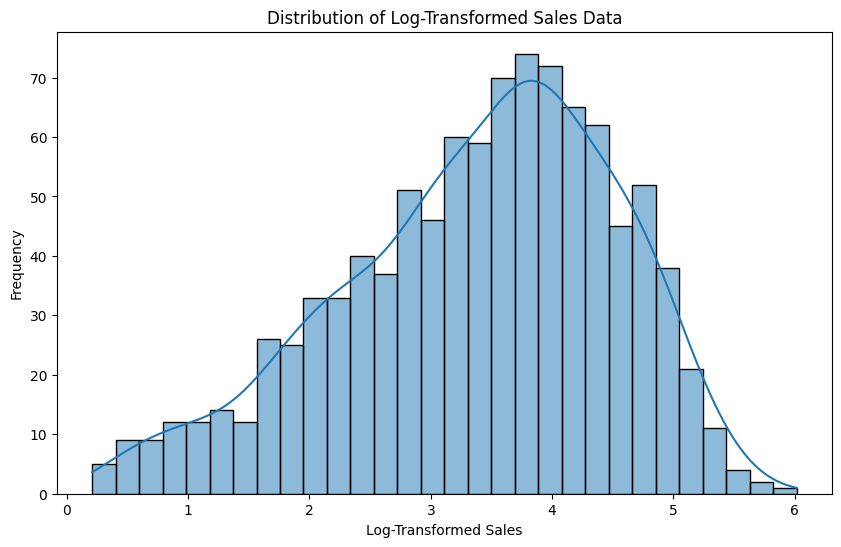

In [7]:
plt.figure(figsize=(10,6))
sns.histplot(log_sales_data,bins=30,kde=True)
plt.title("Distribution of Log-Transformed Sales Data")
plt.xlabel("Log-Transformed Sales")
plt.ylabel("Frequency")

In [8]:
sqrt_sales_data = np.sqrt(sales_data)
sqrt_skewness = skew(sqrt_sales_data)
sqrt_kurtosis = kurtosis(sqrt_sales_data)
print(f"Square Root Transformed Skewness: {sqrt_skewness:.2f}")
print(f"Square Root Transformed Kurtosis: {sqrt_kurtosis:.2f}")

Square Root Transformed Skewness: 0.60
Square Root Transformed Kurtosis: 0.03


Text(0, 0.5, 'Frequency')

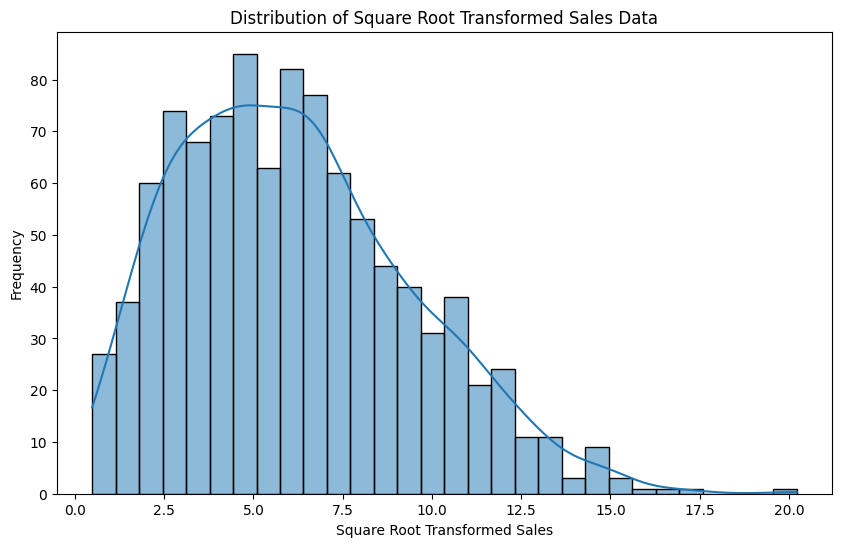

In [9]:
plt.figure(figsize=(10,6))
sns.histplot(sqrt_sales_data,bins=30,kde=True)
plt.title("Distribution of Square Root Transformed Sales Data")
plt.xlabel("Square Root Transformed Sales")
plt.ylabel("Frequency")


You are tasked with analyzing a dataset of student exam scores. The goal is to determine whether the exam preparation program significantly improved scores and to assess the distribution of the scores using skewness and kurtosis.

Scenario
A group of students participated in a preparation program. Their scores before and after the program were recorded. You will:
Perform a paired t-test to determine if the program significantly improved scores.
Calculate the skewness of the post-program scores to assess symmetry.
Calculate the kurtosis of the post-program scores to evaluate the presence of outliers or the sharpness of the distribution peak.
Draw conclusions from these findings.



Tasks
1. Paired t-test
Perform a paired t-test on the pre-program and post-program scores to determine if there is a significant improvement.
Null Hypothesis (H0H_0): There is no difference in the scores before and after the program.
Alternative Hypothesis (H1H_1): The scores after the program are significantly higher than before.

2. Skewness
Calculate the skewness of the post-program scores. Based on the value:
Skewness ~ 0: The distribution is symmetric.
Positive skewness: The distribution has a longer tail on the right.
Negative skewness: The distribution has a longer tail on the left.

3. Kurtosis
Calculate the kurtosis of the post-program scores. Based on the value:
Kurtosis ~ 3: The distribution is normal (mesokurtic).
Kurtosis > 3: The distribution is sharp with heavy tails (leptokurtic).
Kurtosis < 3: The distribution is flat with light tails (platykurtic).

4. Draw Conclusions
Based on the t-test, skewness, and kurtosis findings, write a short report answering:
Did the preparation program significantly improve scores?
Are the post-program scores symmetrically distributed?
Are there any outliers or unusual patterns in the post-program scores?

In [10]:
import pandas as pd
from scipy.stats import ttest_rel
# Create a larger dataset
data = {
    "Student_ID": list(range(1, 51)),  # 50 students
    "Pre_Program_Score": [
        65, 70, 68, 72, 64, 66, 74, 68, 71, 75,
        62, 67, 69, 73, 65, 70, 76, 66, 74, 72,
        60, 63, 68, 70, 64, 62, 75, 69, 71, 77,
        63, 65, 72, 74, 68, 64, 66, 70, 72, 75,
        61, 64, 67, 73, 68, 65, 72, 69, 74, 78
    ],
    "Post_Program_Score": [
        72, 75, 74, 78, 70, 72, 80, 74, 76, 80,
        68, 73, 75, 79, 71, 75, 82, 72, 78, 77,
        65, 69, 74, 76, 70, 67, 80, 74, 76, 82,
        68, 70, 78, 80, 74, 70, 72, 76, 78, 81,
        66, 70, 73, 79, 74, 71, 78, 75, 80, 85
    ]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Save as CSV (optional, if you want to load later)
df.to_csv("student_scores.csv", index=False)

# Display first few rows
print(df.head())


   Student_ID  Pre_Program_Score  Post_Program_Score
0           1                 65                  72
1           2                 70                  75
2           3                 68                  74
3           4                 72                  78
4           5                 64                  70


In [11]:
t_stat, p_value = ttest_rel(df["Pre_Program_Score"], df["Post_Program_Score"])
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("The preparation program significantly improved scores.")
else:
    print("There is no significant difference in scores before and after the program.")

T-statistic: -70.60509614744568
P-value: 5.880696260806754e-51
The preparation program significantly improved scores.


In [12]:
post_pogram_skewness = skew(df["Post_Program_Score"])
print(f"Post-program Skewness: {post_pogram_skewness}")
if abs(post_pogram_skewness) < 0.5:
    print("The post-program scores are approximately symmetric.")
elif post_pogram_skewness > 0:
    print("The post-program scores are positively skewed.")
else:
    print("The post-program scores are negatively skewed.")

Post-program Skewness: -0.02510682175191318
The post-program scores are approximately symmetric.


Text(0, 0.5, 'Frequency')

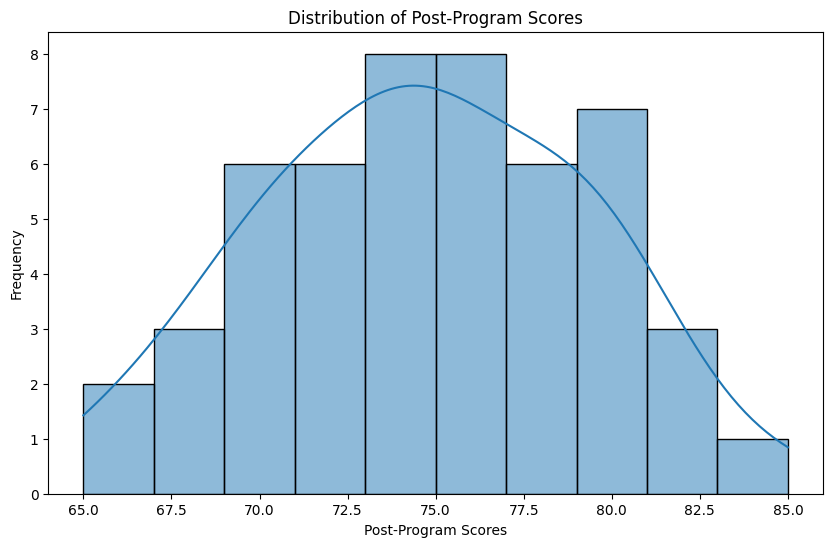

In [13]:
plt.figure(figsize=(10,6))
sns.histplot(df["Post_Program_Score"],bins=10,kde=True)
plt.title("Distribution of Post-Program Scores")
plt.xlabel("Post-Program Scores")
plt.ylabel("Frequency")

In [14]:
post_program_kurtosis = kurtosis(df["Post_Program_Score"])
print(f"Post-program Kurtosis: {post_program_kurtosis}")

if abs(post_program_kurtosis-3)<0.5:
  print("The distribution of post-program scores is mesokurtic(normal).")
elif post_program_kurtosis > 3:
    print("The distribution of post-program scores is leptokurtic(sharp peak).")
else:
    print("The distribution of post-program scores is platykurtic.(flat peak)")

Post-program Kurtosis: -0.6159711119863349
The distribution of post-program scores is platykurtic.(flat peak)


Text(0, 0.5, 'Frequency')

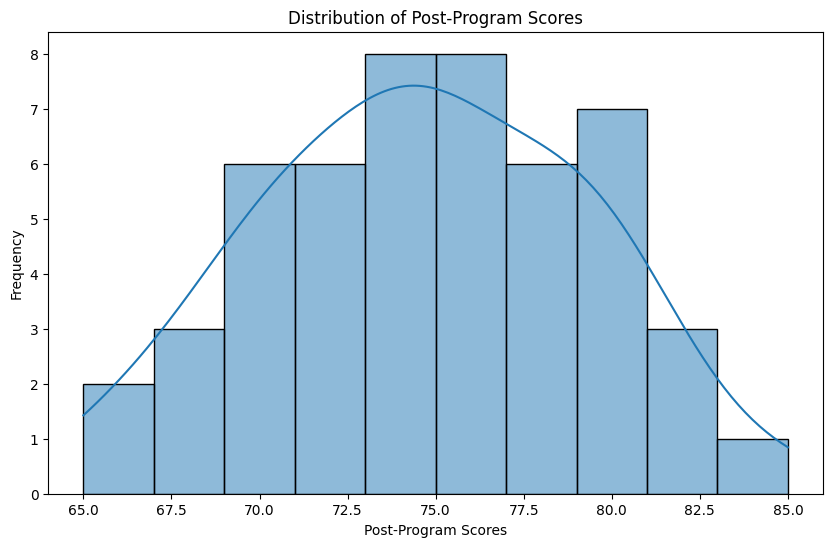

In [15]:
plt.figure(figsize=(10,6))
sns.histplot(df["Post_Program_Score"],bins=10,kde=True)
plt.title("Distribution of Post-Program Scores")
plt.xlabel("Post-Program Scores")
plt.ylabel("Frequency")

Text(0.5, 0, 'Post-Program Scores')

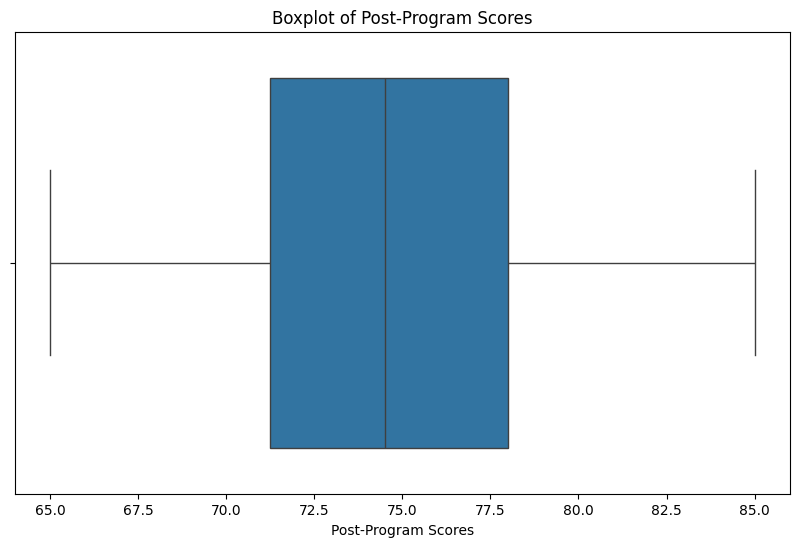

In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df["Post_Program_Score"])
plt.title("Boxplot of Post-Program Scores")
plt.xlabel("Post-Program Scores")
#

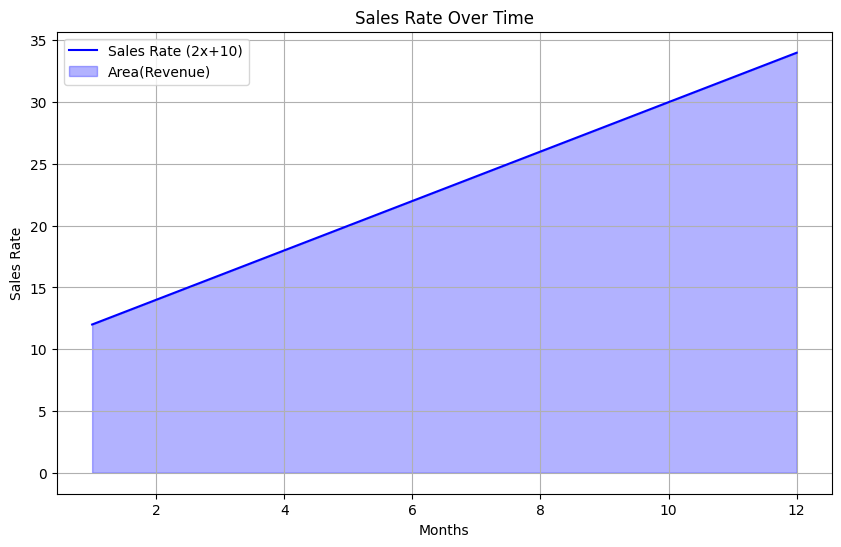

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps
months = np.linspace(1,12, 100)
sales_rate = 2*months + 10

plt.figure(figsize=(10,6))
plt.plot(months, sales_rate, label = "Sales Rate (2x+10)", color = "blue")
plt.fill_between(months,sales_rate, alpha=0.3, color="blue", label="Area(Revenue)")
plt.title("Sales Rate Over Time")
plt.xlabel("Months")
plt.ylabel("Sales Rate")
plt.legend()
plt.grid(True)
plt.show()

In [18]:
total_revenue=simps(sales_rate,months)
print(f"Total Revenue: ${total_revenue:.2f}")

Total Revenue: $253.00


<ipython-input-18-84cd1668f8b9>:1: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  total_revenue=simps(sales_rate,months)


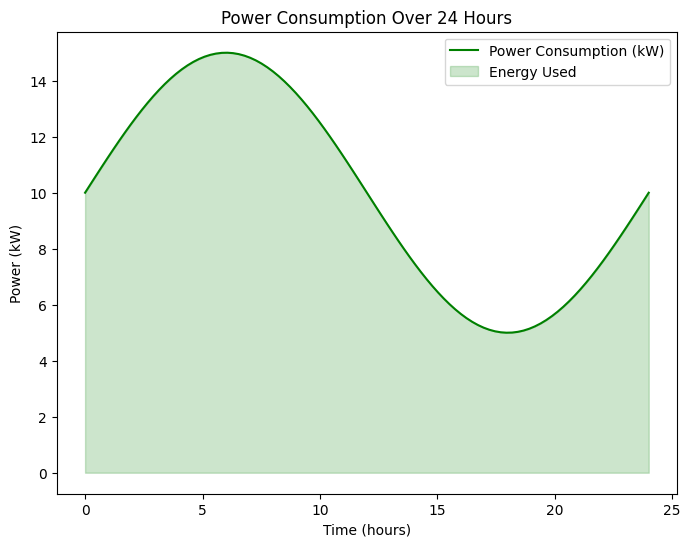

<ipython-input-19-308634093b30>:21: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  total_energy = simps(power_consumption, time)


Total Energy Consumed Over 24 Hours: 240.00 kWh


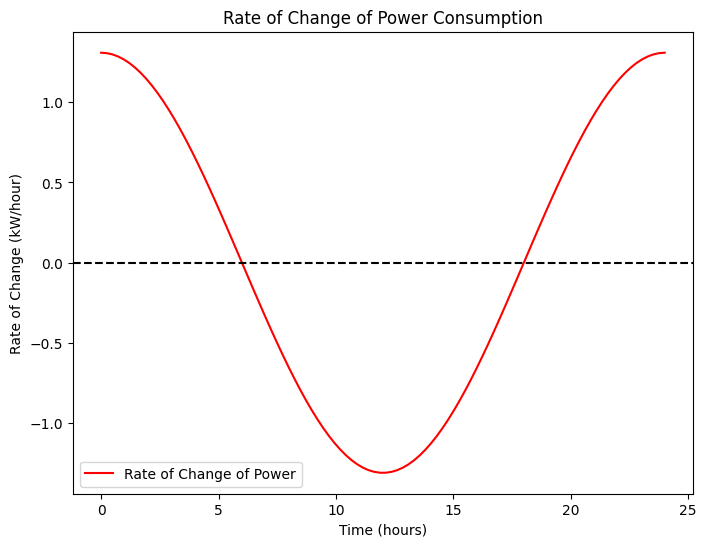

Peak Power Usage Rate: 1.31 kW/hour
Peak Power Consumption: 15.00 kW


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps
import pandas as pd

# Step 1: Create synthetic data (Power consumption in kW)
time = np.linspace(0, 24, 100)  # Time: 0 to 24 hours
power_consumption = 5 * np.sin(2 * np.pi * time / 24) + 10  # Power function (cyclical)

# Step 2: Visualize power consumption
plt.figure(figsize=(8, 6))
plt.plot(time, power_consumption, label="Power Consumption (kW)", color="green")
plt.fill_between(time, power_consumption, alpha=0.2, color="green", label="Energy Used")
plt.title("Power Consumption Over 24 Hours")
plt.xlabel("Time (hours)")
plt.ylabel("Power (kW)")
plt.legend()
plt.show()

# Step 3: Integral (Total Energy Consumption)
total_energy = simps(power_consumption, time)
print(f"Total Energy Consumed Over 24 Hours: {total_energy:.2f} kWh")

# Step 4: Differentiation (Rate of Change)
power_rate_of_change = np.gradient(power_consumption, time)

# Step 5: Visualize the rate of change
plt.figure(figsize=(8, 6))
plt.plot(time, power_rate_of_change, label="Rate of Change of Power", color="red")
plt.title("Rate of Change of Power Consumption")
plt.xlabel("Time (hours)")
plt.ylabel("Rate of Change (kW/hour)")
plt.axhline(0, color='black', linestyle='--')
plt.legend()
plt.show()

# Find peak power usage rate
peak_power_rate = max(power_rate_of_change)
print(f"Peak Power Usage Rate: {peak_power_rate:.2f} kW/hour")

peak_power = max(power_consumption)
print(f"Peak Power Consumption: {peak_power:.2f} kW")


In [20]:
import numpy as np
from scipy import stats
import time

# Step 1: Create a large random array of floating-point numbers
np.random.seed(42)  # Ensures reproducibility
large_array = np.random.rand(10_000_000)  # 10 million random numbers between 0 and 1
stats.tstd(large_array)

0.2886748850703886

In [21]:
import numpy as np
from scipy import stats
import time

# Step 1: Create a large random array of floating-point numbers
np.random.seed(42)  # Ensures reproducibility
large_array = np.random.rand(10_000_000)  # 10 million random numbers between 0 and 1

# Step 2: Compute mean and standard deviation using NumPy
start_time_numpy = time.time()
numpy_mean = np.mean(large_array)
numpy_std = np.std(large_array)
numpy_time = time.time() - start_time_numpy

# Step 3: Compute mean and standard deviation using SciPy
start_time_scipy = time.time()
scipy_mean, scipy_std = stats.describe(large_array)[2:4]  # [2] = mean, [3] = variance (std needs sqrt)
scipy_std = np.sqrt(scipy_std)  # Convert variance to standard deviation
scipy_time = time.time() - start_time_scipy

# Step 4: Compare results and execution time
print("NumPy Results:")
print(f"Mean: {numpy_mean:.6f}, Standard Deviation: {numpy_std:.6f}")
print(f"Execution Time: {numpy_time:.6f} seconds\n")

print("SciPy Results:")
print(f"Mean: {scipy_mean:.6f}, Standard Deviation: {scipy_std:.6f}")
print(f"Execution Time: {scipy_time:.6f} seconds\n")

# Step 5: Compute mean and standard deviation using a purely Python implementation for comparison
start_time_pure_python = time.time()
python_mean = sum(large_array) / len(large_array)
python_std = (sum((x - python_mean) ** 2 for x in large_array) / len(large_array)) ** 0.5
python_time = time.time() - start_time_pure_python

print("Pure Python Results:")
print(f"Mean: {python_mean:.6f}, Standard Deviation: {python_std:.6f}")
print(f"Execution Time: {python_time:.6f} seconds")


NumPy Results:
Mean: 0.499992, Standard Deviation: 0.288675
Execution Time: 0.123421 seconds

SciPy Results:
Mean: 0.499992, Standard Deviation: 0.288675
Execution Time: 0.930215 seconds

Pure Python Results:
Mean: 0.499992, Standard Deviation: 0.288675
Execution Time: 9.086884 seconds


In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
from scipy.integrate import simps

# Load the dataset
tips = sns.load_dataset("tips")
# Display basic information
print(tips.info())
print(tips.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


### **Question: Advanced Data Analysis on the `tips` Dataset**

#### **Scenario**:
You are tasked with analyzing the `tips` dataset to uncover insights about customer behavior at a restaurant. Your analysis must focus on creating new features, understanding relationships between existing features, and summarizing trends using statistical tools.

---

### **Tasks**

#### **1. Feature Engineering**
Create and analyze the following new features:
1. **Tip Percentage**: Calculate the percentage of the tip relative to the total bill for each observation.
2. **Bill Per Person**: Normalize the total bill by the size of the dining party.

**Questions**:
1. Which day of the week has the highest average tip percentage?
2. Is the bill per person higher on weekends compared to weekdays? Use visualizations to justify your conclusion.

---

#### **2. Correlation and Covariance**
Analyze the relationships between numerical variables in the dataset.

**Questions**:
1. Which variables have the strongest correlation? What does this indicate about their relationship?
2. Which pair of variables shows the highest covariance? How does this differ from correlation?

Create a heatmap for correlation and explain the key relationships observed.

---

#### **3. Integration Using SciPy**
Simulate a cumulative distribution of tips to understand tipping trends.

**Questions**:
1. Use integration (Simpson’s rule) to compute the total "effective" tips collected over the entire dataset.
2. What does this integrated value represent in terms of restaurant revenue or customer behavior?

---

### **Expected Deliverables**
1. Code that implements feature engineering, correlation, covariance, and integration.
2. Visualizations for new features, correlation heatmap, and tip trends.
3. Insights derived from the analysis.

---


<ipython-input-29-727f98c50a24>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_tip_percentage = tips.groupby('day')['tip_percentage'].mean()


Day with the highest average tip percentage: Fri


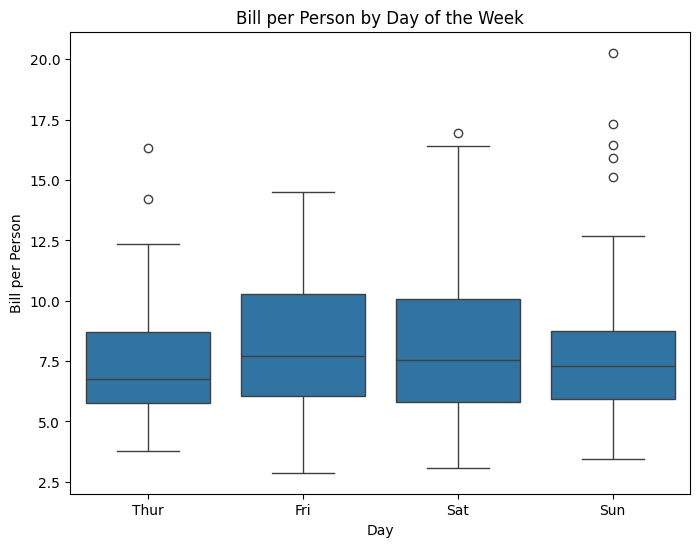

Correlation Matrix:
                  total_bill       tip      size  tip_percentage  \
total_bill         1.000000  0.675734  0.598315       -0.338624   
tip                0.675734  1.000000  0.489299        0.342370   
size               0.598315  0.489299  1.000000       -0.142860   
tip_percentage    -0.338624  0.342370 -0.142860        1.000000   
bill_per_person    0.647497  0.347393 -0.175412       -0.314156   

                 bill_per_person  
total_bill              0.647497  
tip                     0.347393  
size                   -0.175412  
tip_percentage         -0.314156  
bill_per_person         1.000000  

Covariance Matrix:
                  total_bill       tip      size  tip_percentage  \
total_bill        79.252939  8.323502  5.065983      -18.410650   
tip                8.323502  1.914455  0.643906        2.893086   
size               5.065983  0.643906  0.904591       -0.829811   
tip_percentage   -18.410650  2.893086 -0.829811       37.298141   
bill_per_p

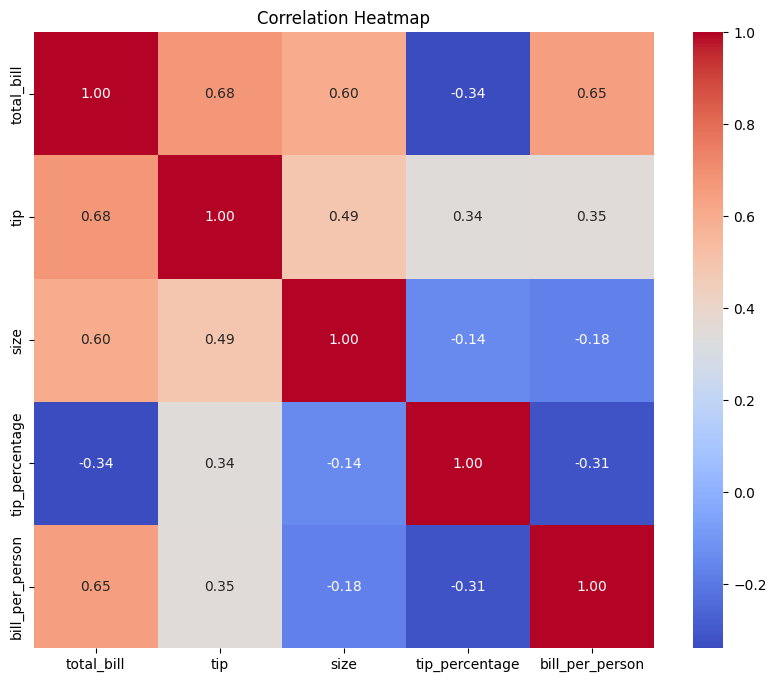


Total Effective Tips (using Simpson's rule): 734.30


<ipython-input-29-727f98c50a24>:35: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  total_effective_tips = simps(tips['tip'], tips.index)


In [29]:
# Calculate Tip Percentage
tips['tip_percentage'] = (tips['tip'] / tips['total_bill']) * 100

# Calculate Bill Per Person
tips['bill_per_person'] = tips['total_bill'] / tips['size']

# Question 1: Day with highest average tip percentage
day_tip_percentage = tips.groupby('day')['tip_percentage'].mean()
print(f"Day with the highest average tip percentage: {day_tip_percentage.idxmax()}")

# Question 2: Bill per person higher on weekends?
plt.figure(figsize=(8, 6))
sns.boxplot(x='day', y='bill_per_person', data=tips)
plt.title('Bill per Person by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Bill per Person')
plt.show()

# Correlation and Covariance
numeric_tips = tips.select_dtypes(include=['number'])  # Select only numeric columns
correlation_matrix = numeric_tips.corr()
print("Correlation Matrix:\n", correlation_matrix)

# Calculate covariance only for numeric columns
covariance_matrix = numeric_tips.cov()  # Changed from tips.cov() to numeric_tips.cov()
print("\nCovariance Matrix:\n", covariance_matrix)

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Integration using Simpson's rule
total_effective_tips = simps(tips['tip'], tips.index)
print(f"\nTotal Effective Tips (using Simpson's rule): {total_effective_tips:.2f}")